### Assignment

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

#### Data description

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

File name: medical_examination.csv

| Feature | Variable Type | Variable      | Value Type |
|:-------:|:------------:|:-------------:|:----------:|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

#### Tasks

Create a chart similar to `examples/Figure_1.png`, where we show the counts of good and bad outcomes for the `cholesterol`, `gluc`, `alco`, `active`, and `smoke` variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in `medical_data_visualizer.py`:
* Add an `overweight` column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
* Normalize the data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.
* Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. The chart should look like `examples/Figure_1.png`.
* Clean the data. Filter out the following patient segments that represent incorrect data:
  - diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
  - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
  - height is more than the 97.5th percentile
  - weight is less than the 2.5th percentile
  - weight is more than the 97.5th percentile
* Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's `heatmap()`. Mask the upper triangle. The chart should look like `examples/Figure_2.png`.

Any time a variable is set to `None`, make sure to set it to the correct code.

Unit tests are written for you under `test_module.py`.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.size

910000

In [5]:
df.shape

(70000, 13)

In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

## Add Column
Add an `overweight` column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [8]:
df['overweight'] = df['weight'] / (df['height']/100)**2

In [9]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [10]:
# https://numpy.org/doc/stable/reference/generated/numpy.where.html
np.where(df['overweight'] > 25 , 1, 0)

array([0, 1, 0, ..., 1, 1, 0])

In [11]:
df['overweight'] = np.where(df['overweight'] > 25 , 1, 0)

In [12]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [13]:
df['overweight'].value_counts()

1    43546
0    26454
Name: overweight, dtype: int64

## Normalize Data
Normalize data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.

In [14]:
df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [15]:
df['cholesterol'] = np.where(df['cholesterol'] == 1 , 0, 1)

In [16]:
df['cholesterol'].value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [17]:
df['gluc'].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [18]:
df['gluc'] = np.where(df['gluc'] == 1 , 0, 1)

In [19]:
df['gluc'].value_counts()

0    59479
1    10521
Name: gluc, dtype: int64

# Draw Categorical Plot
## Create DataFrame for cat plot using pd.melt
Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

In [20]:
df_cat = pd.melt(df,  id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

In [21]:
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


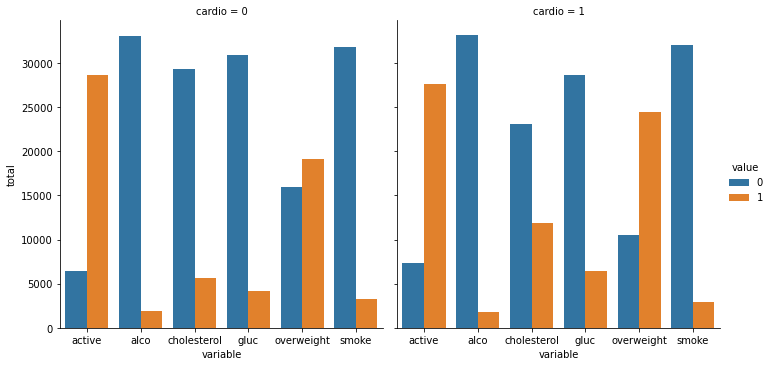

In [22]:
sns.catplot(x ='variable', hue='value', col='cardio', data=df_cat, kind='count').set_axis_labels('variable', 'total')

## Group and reformat the data to split it by 'cardio'
Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

In [23]:
df_cat.groupby(['cardio', 'variable', 'value'], as_index = False).size().rename(columns={'size':'total'})

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


# Clean the data 

Filter out the following patient segments that represent incorrect data:

>    diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

>    height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))

>    height is more than the 97.5th percentile

>    weight is less than the 2.5th percentile

>    weight is more than the 97.5th percentile


In [24]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [25]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,0.251643,0.150300,0.088129,0.053771,0.803729,0.499700,0.622086
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.433960,0.357368,0.283484,0.225568,0.397179,0.500003,0.484870
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9aab5765e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9aab576cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9aab576280>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9aab5813d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9aab581730>,
 'means': []}

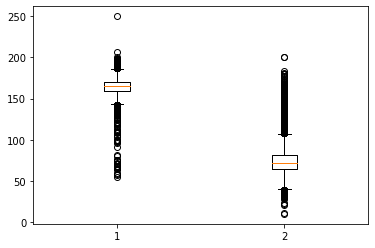

In [26]:
plt.boxplot(df[['height', 'weight']])

In [27]:
(df['ap_lo'] <= df['ap_hi']).value_counts()

True     68766
False     1234
dtype: int64

In [28]:
(df['height'] >= df['height'].quantile(0.025)).value_counts()

True     68463
False     1537
Name: height, dtype: int64

In [29]:
(df['height'] <= df['height'].quantile(0.975)).value_counts()

True     68561
False     1439
Name: height, dtype: int64

In [30]:
(df['weight'] >= df['weight'].quantile(0.025)).value_counts()

True     68510
False     1490
Name: weight, dtype: int64

In [31]:
(df['weight'] <= df['weight'].quantile(0.975)).value_counts()

True     68387
False     1613
Name: weight, dtype: int64

In [32]:
df_heat = df.loc[
    (df['ap_lo'] <= df['ap_hi']) 
    & (df['height'] >= df['height'].quantile(0.025)) 
    & (df['height'] <= df['height'].quantile(0.975)) 
    & (df['weight'] >= df['weight'].quantile(0.025)) 
    & (df['weight'] <= df['weight'].quantile(0.975))
    ]

In [33]:
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [34]:
df_heat.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
count,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000
mean,49891.225770,19467.169004,1.346828,164.490112,73.525384,128.851152,81.208239,0.245657,0.147125,0.086296,0.052593,0.803411,0.493621,0.621398
std,28834.472519,2462.691222,0.476263,6.864083,11.914258,161.596380,9.520961,0.430479,0.354234,0.280803,0.223222,0.397422,0.499963,0.485043
min,0.000000,10798.000000,1.000000,150.000000,51.000000,12.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24909.500000,17671.000000,1.000000,160.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,49887.000000,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,74727.500000,21321.000000,2.000000,169.000000,81.000000,140.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,180.000000,108.000000,16020.000000,182.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9aafee64c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9aafee6bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9aafee6160>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9aafeef2b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9aafeef610>,
 'means': []}

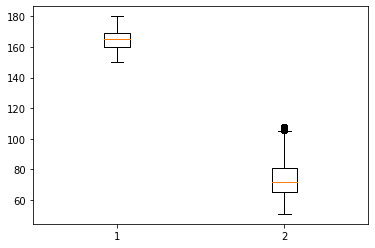

In [35]:
plt.boxplot(df_heat[['height', 'weight']])

In [36]:
df[['height', 'weight']].describe()

,height,weight
count,70000.000000,70000.000000
mean,164.359229,74.205690
std,8.210126,14.395757
min,55.000000,10.000000
25%,159.000000,65.000000
50%,165.000000,72.000000
75%,170.000000,82.000000
max,250.000000,200.000000


In [37]:
df_heat[['height', 'weight']].describe()

,height,weight
count,63259.000000,63259.000000
mean,164.490112,73.525384
std,6.864083,11.914258
min,150.000000,51.000000
25%,160.000000,65.000000
50%,165.000000,72.000000
75%,169.000000,81.000000
max,180.000000,108.000000


In [38]:
df[['ap_hi', 'ap_lo']].describe()

,ap_hi,ap_lo
count,70000.000000,70000.000000
mean,128.817286,96.630414
std,154.011419,188.472530
min,-150.000000,-70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,11000.000000


In [39]:
df_heat[['ap_hi', 'ap_lo']].describe()

,ap_hi,ap_lo
count,63259.000000,63259.000000
mean,128.851152,81.208239
std,161.596380,9.520961
min,12.000000,-70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,182.000000


In [40]:
df_heat['ap_hi'].max()

16020

In [41]:
df_heat.loc[df_heat['ap_hi'] == 16020]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
40852,58374,17438,1,169,70.0,16020,80,0,0,0,0,0,1,0


In [42]:
df_heat['ap_hi'].nlargest(10)

40852    16020
25464    14020
25519    14020
46912    14020
47253    14020
55459    13010
55847    13010
7763     11500
51438    11020
69370     2000
Name: ap_hi, dtype: int64

# Create a correlation matrix
Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png

In [43]:
np.corrcoef(df_heat['cholesterol'], df_heat['gluc'])

array([[1.        , 0.38374306],
       [0.38374306, 1.        ]])

In [44]:
np.corrcoef(df['cholesterol'], df['gluc'])

array([[1.        , 0.38325235],
       [0.38325235, 1.        ]])

In [45]:
corr = df_heat.corr()

In [46]:
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


<AxesSubplot:>

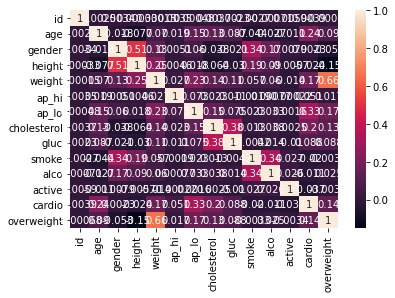

In [47]:
sns.heatmap(corr, annot = True)

In [48]:
mask = np.zeros_like(corr)

In [49]:
mask[np.triu_indices_from(mask)] = True

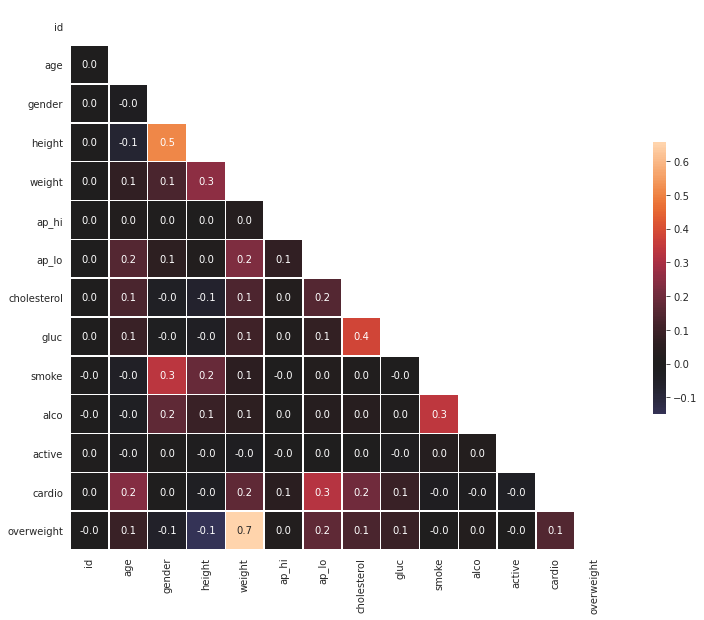

In [50]:
with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(14, 10))

    ax = sns.heatmap(corr, annot = True, mask=mask, fmt='.1f', center=0, linewidths=.5, square=True, cbar_kws={'shrink':0.5})
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)